# JVG Barista Income Highlights (3/2022 - 12/2023)
## 1. Prepare Data Set

In [1]:
library("tidyverse")
library(ggplot2)
library(gganimate)
library(gifski)
library(av)
library(gapminder)

Income = read_csv('https://raw.githubusercontent.com/rcjones9/Budget/main/JVG%20Calc%20Clean.csv', col_types = cols()) |>
    select(Role, Month, Date, Day, Shift, Time, Rate, Tips, Total, Year) |> na.omit()

Income = subset(Income, Role=="Barista")

tail(Income)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Role,Month,Date,Day,Shift,Time,Rate,Tips,Total,Year
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Barista,December,12/7/23,Thursday,Close,369.0,12,46.80,120.60,2023
Barista,December,12/4/23,Monday,Close,362.4,12,39.91,112.39,2023
Barista,December,12/3/23,Sunday,Close,361.2,12,93.80,166.04,2023
Barista,December,12/2/23,Saturday,Close,380.4,12,67.61,143.69,2023
Barista,December,12/1/23,Friday,Close,369.0,12,52.17,125.97,2023
Barista,November,11/26/23,Sunday,Close,394.2,12,61.48,140.32,2023


## 2. Construction of display_gif function

In [2]:
display_gif <- function(gganim, ...){
    
    raw = suppressMessages(animate(gganim, ...))
    
    contents <- base64enc::base64encode(raw)
    tag <- '<img src="data:image/gif;base64,%s">'
    
    IRdisplay::display_html(sprintf(tag, contents))
    
}

## 3. This animation is misleading because I have started closing so much in 2023


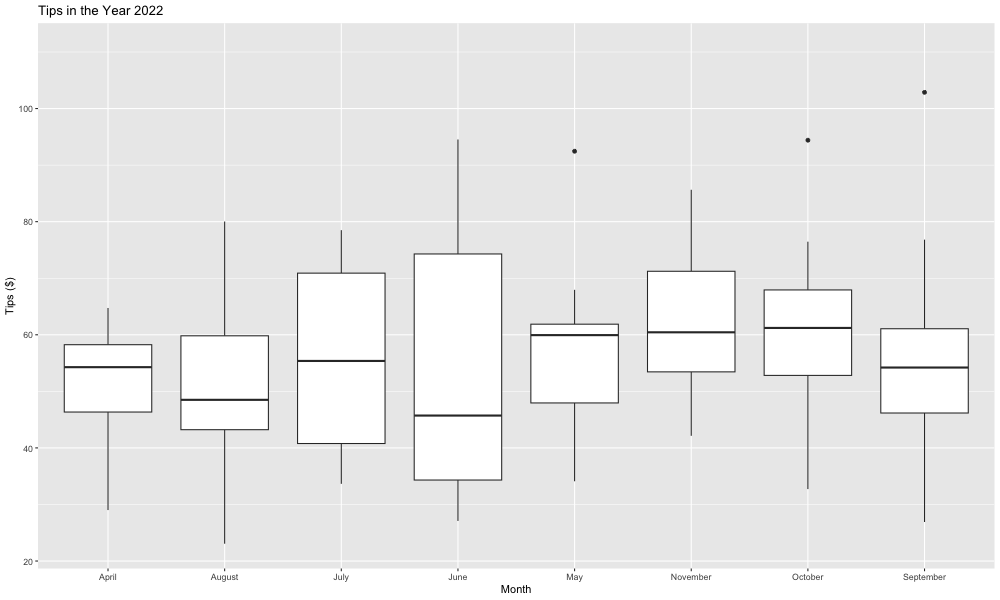

In [3]:
Income_new = Income |> 
    filter(Month %in% c("April", "May", "June", "July", "August", "September", "October", "November"))

anim2 = ggplot(Income_new, aes(x = Month, y = Tips)) + 
    geom_boxplot() +
    ggtitle('Tips in the Year {closest_state}') +
    transition_states(factor(Year),
                      transition_length = 2,
                      state_length = 1) + 
    enter_fade() + 
    exit_shrink() +
    ease_aes('sine-in-out') +
    labs(x = "Month", y = "Tips ($)")

display_gif(anim2, w = 1000, h = 600)

## 3.1


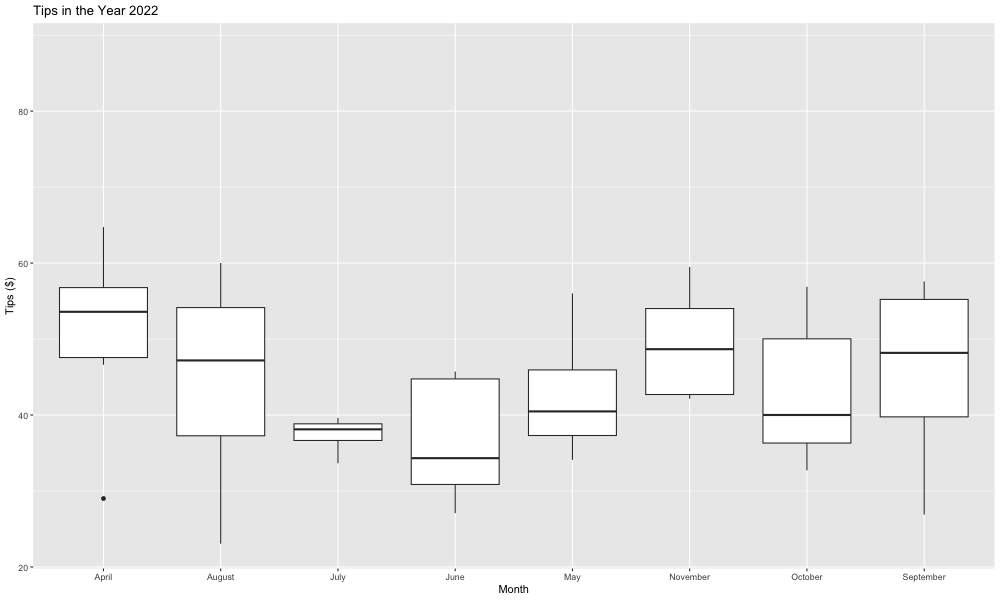

In [4]:
Income_new = Income |> 
    filter(Month %in% c("April", "May", "June", "July", "August", "September", "October", "November")) |>
    filter(Shift %in% c("Close"))

anim2 = ggplot(Income_new, aes(x = Month, y = Tips)) + 
    geom_boxplot() +
    ggtitle('Tips in the Year {closest_state}') +
    transition_states(factor(Year),
                      transition_length = 2,
                      state_length = 1) + 
    enter_fade() + 
    exit_shrink() +
    ease_aes('sine-in-out') +
    labs(x = "Month", y = "Tips ($)")

display_gif(anim2, w = 1000, h = 600)

## 4. Breakdown of the display_gif function
### function()
Source about using the "function()" command: https://www.dataquest.io/blog/write-functions-in-r/

```
 function_name <- function(parameters){
    function body 
}
```

In this case, the function was named "display_gif" and given the parameters "gganim" and an ellipses.
The contents within the bracket were as follows:

#### 1. "raw ="

the first line supresses all of the messages that are usually displayed when one uses gganimate

#### 2. "contents"

Source that explains what "base 64 encoder" is: https://www.base64encoder.io/learn/

This line uses base 64 encoder to...

#### 3. "tag"

This line also uses base 64 encoder and creates an image...

#### 4. "IRdisplay"

This final line includes the two previous lines "contents" and "tag". I am assuming that this line involves how the final product is printed, the literal display of the gif. "display_html" is a function from the IRdisplay package?! The double colon specifies to use a function from a particular package like:

```
install.packages('devtools')
devtools::install_github('thomasp85/gganimate')
```

sprintf() is a function that...

## 5. Explanation of gganimate parameters
Source of gganimate instruction: https://gganimate.com/index.html
```
ggplot() +
    geom_(insert visual)() +
    transition_states() +
    enter_fade() +
    exit_shrink() +
    ease_aes()
```

### transition_states
### enter()/exit()
### ease_aes()

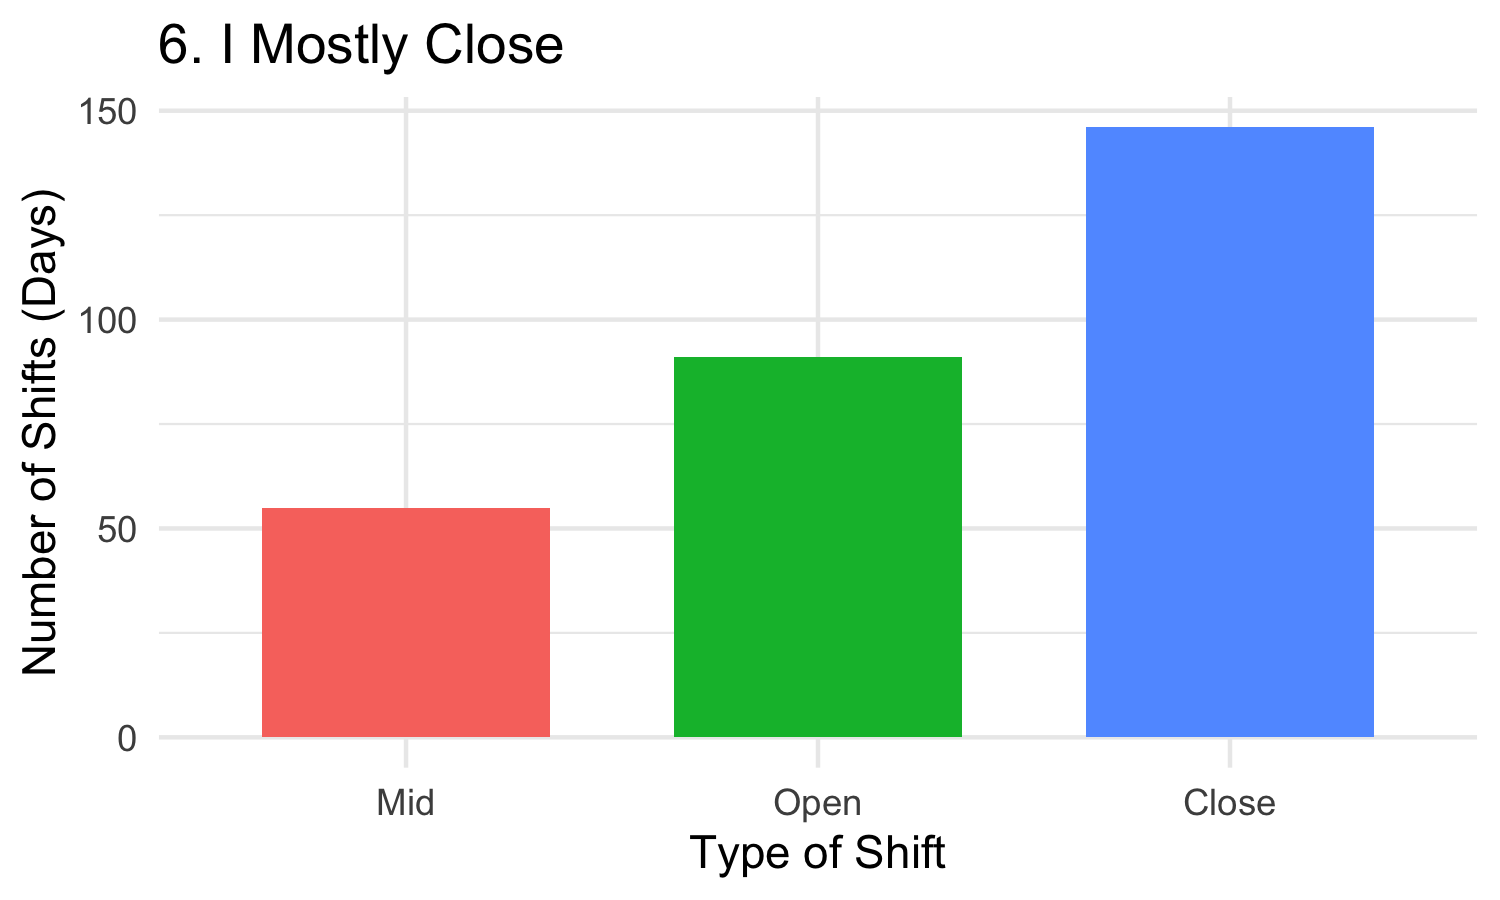

In [5]:
options( repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 300)

Income_shift = Income |>
    mutate( Shift_sorted = Shift |> 
           fct_relevel('Mid', 'Open', 'Close')
          )

p1 = ggplot(data = Income_shift, aes(x=Shift_sorted, fill = Shift_sorted)) +
    geom_bar(width = 0.7, show.legend = FALSE, position = "stack") +
    labs(title = "6. I Mostly Close", x = "Type of Shift", y = "Number of Shifts (Days)") +
    theme_minimal() 
p1

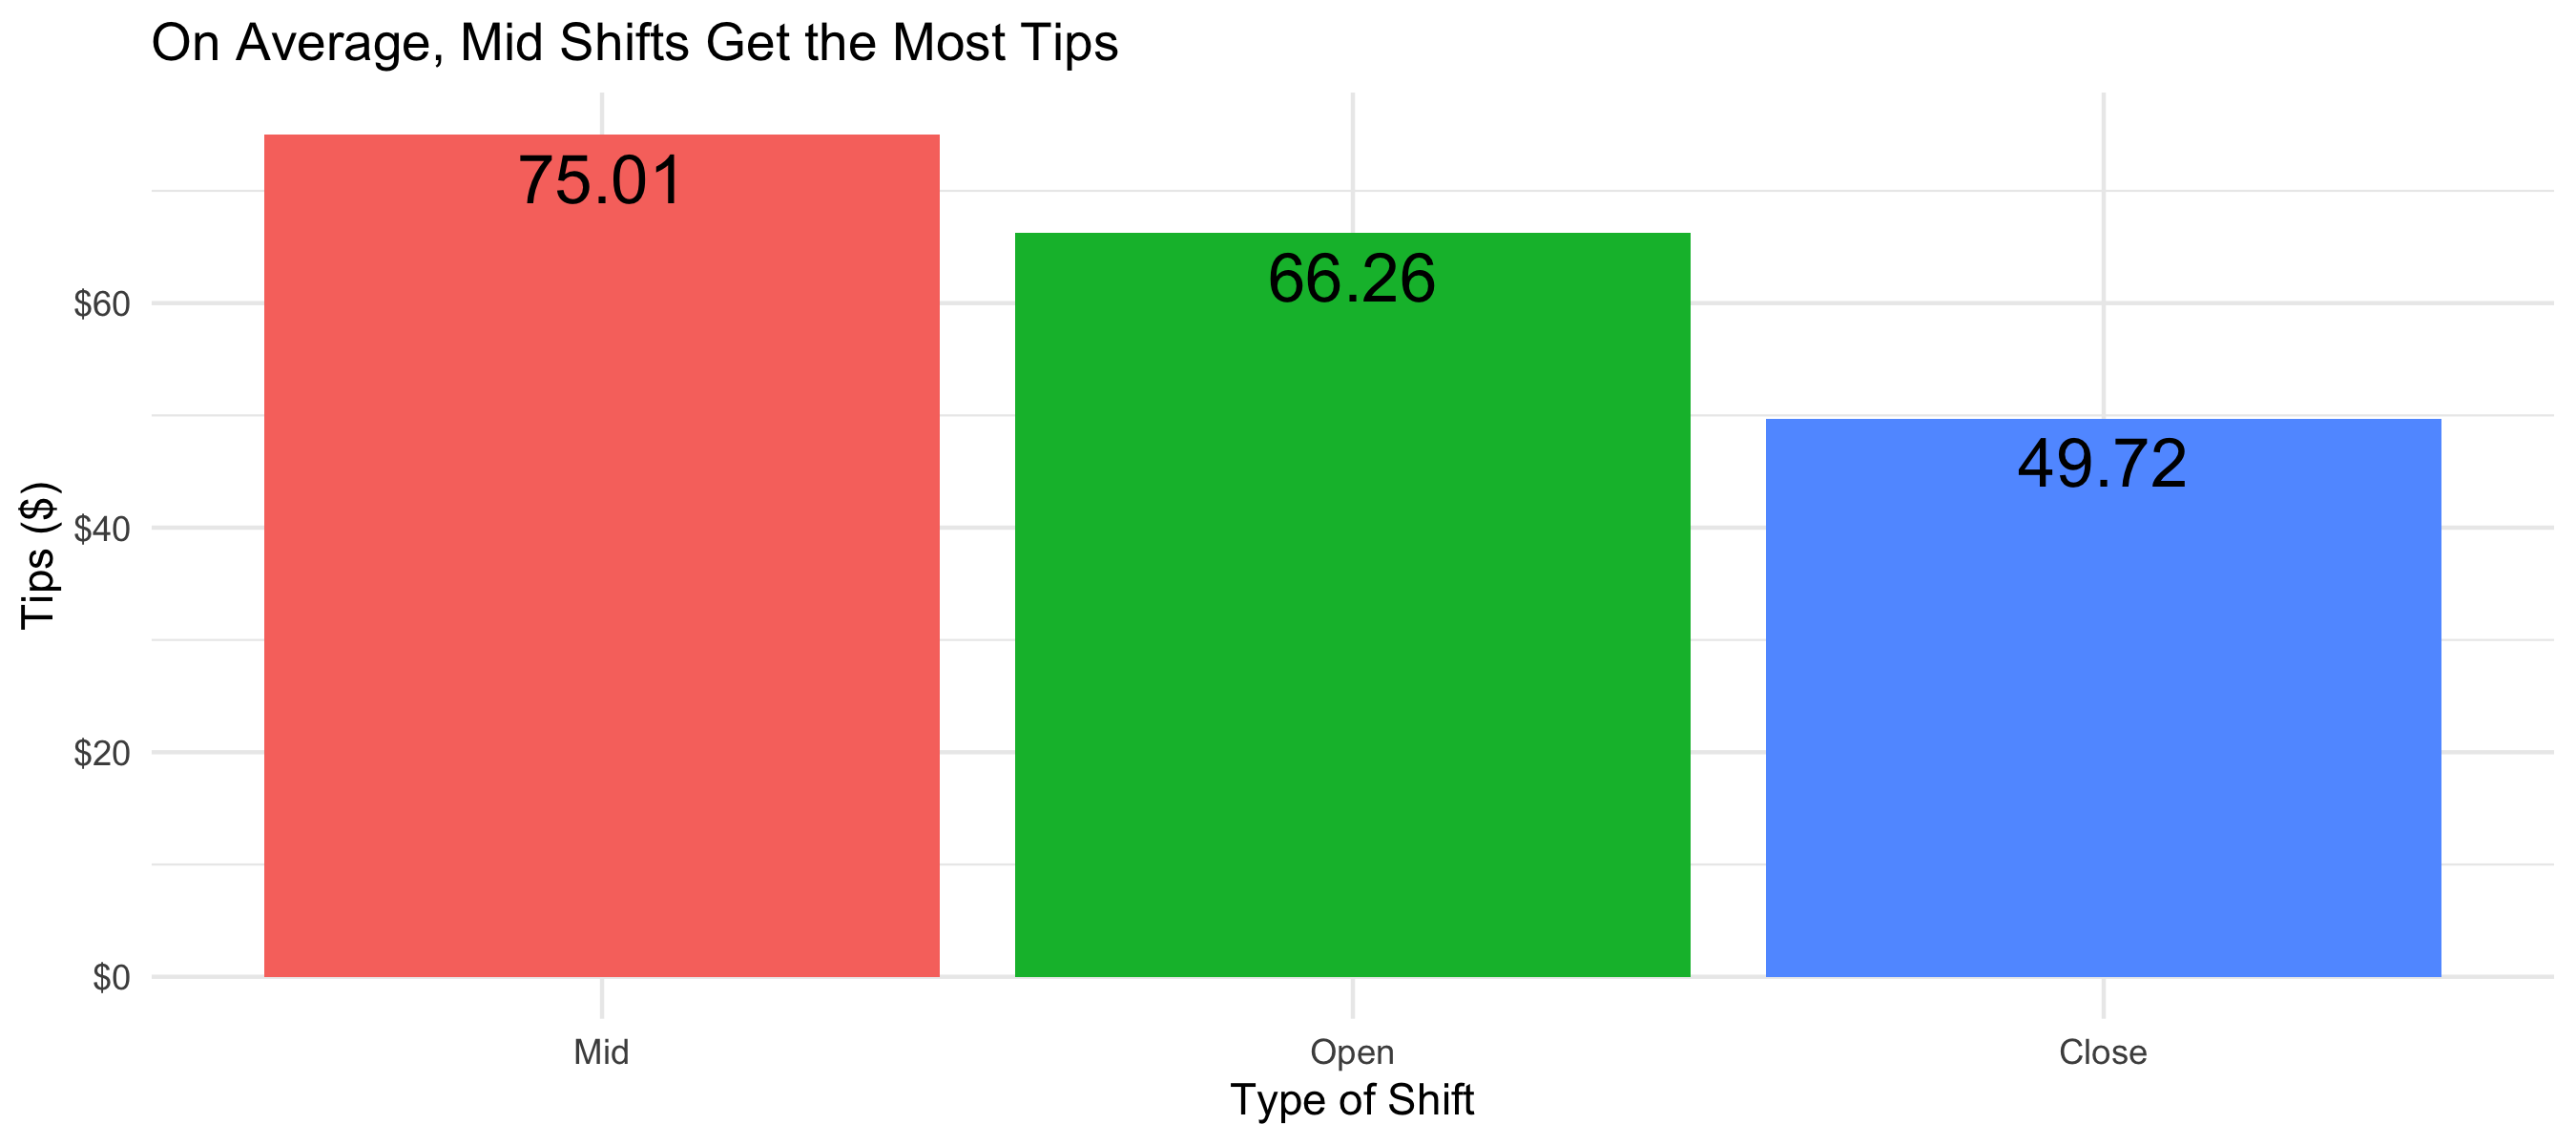

In [6]:
options( repr.plot.width = 9, repr.plot.height = 4, repr.plot.res = 300)

Income_shift = Income |>
    group_by(Shift) |>
    summarize( Tips = mean(Tips)) |>
    mutate( Shift_sorted2 = Shift |> 
           fct_relevel('Mid', 'Open', 'Close'))

p4 = ggplot( data = Income_shift, aes(x = Shift_sorted2, y= Tips)) +
    geom_col(na.rm = FALSE, aes(fill = Shift_sorted2), show.legend = FALSE ) +
    geom_text(color = 'black', vjust = 1.4, size = 6, aes(label = round(Tips, digits=2))) +
    labs(title = "On Average, Mid Shifts Get the Most Tips", x = "Type of Shift", y = "Tips ($)") +
    scale_y_continuous(labels = scales::dollar)+
    theme_minimal()


p4

In [7]:
Income_days = Income |>
    group_by(Day) |>
    summarize(N = n()) |>
    arrange(desc(N))

Income_days

Day,N
<chr>,<int>
Friday,71
Saturday,63
Monday,56
Sunday,55
Tuesday,26
Thursday,11
Wednesday,10


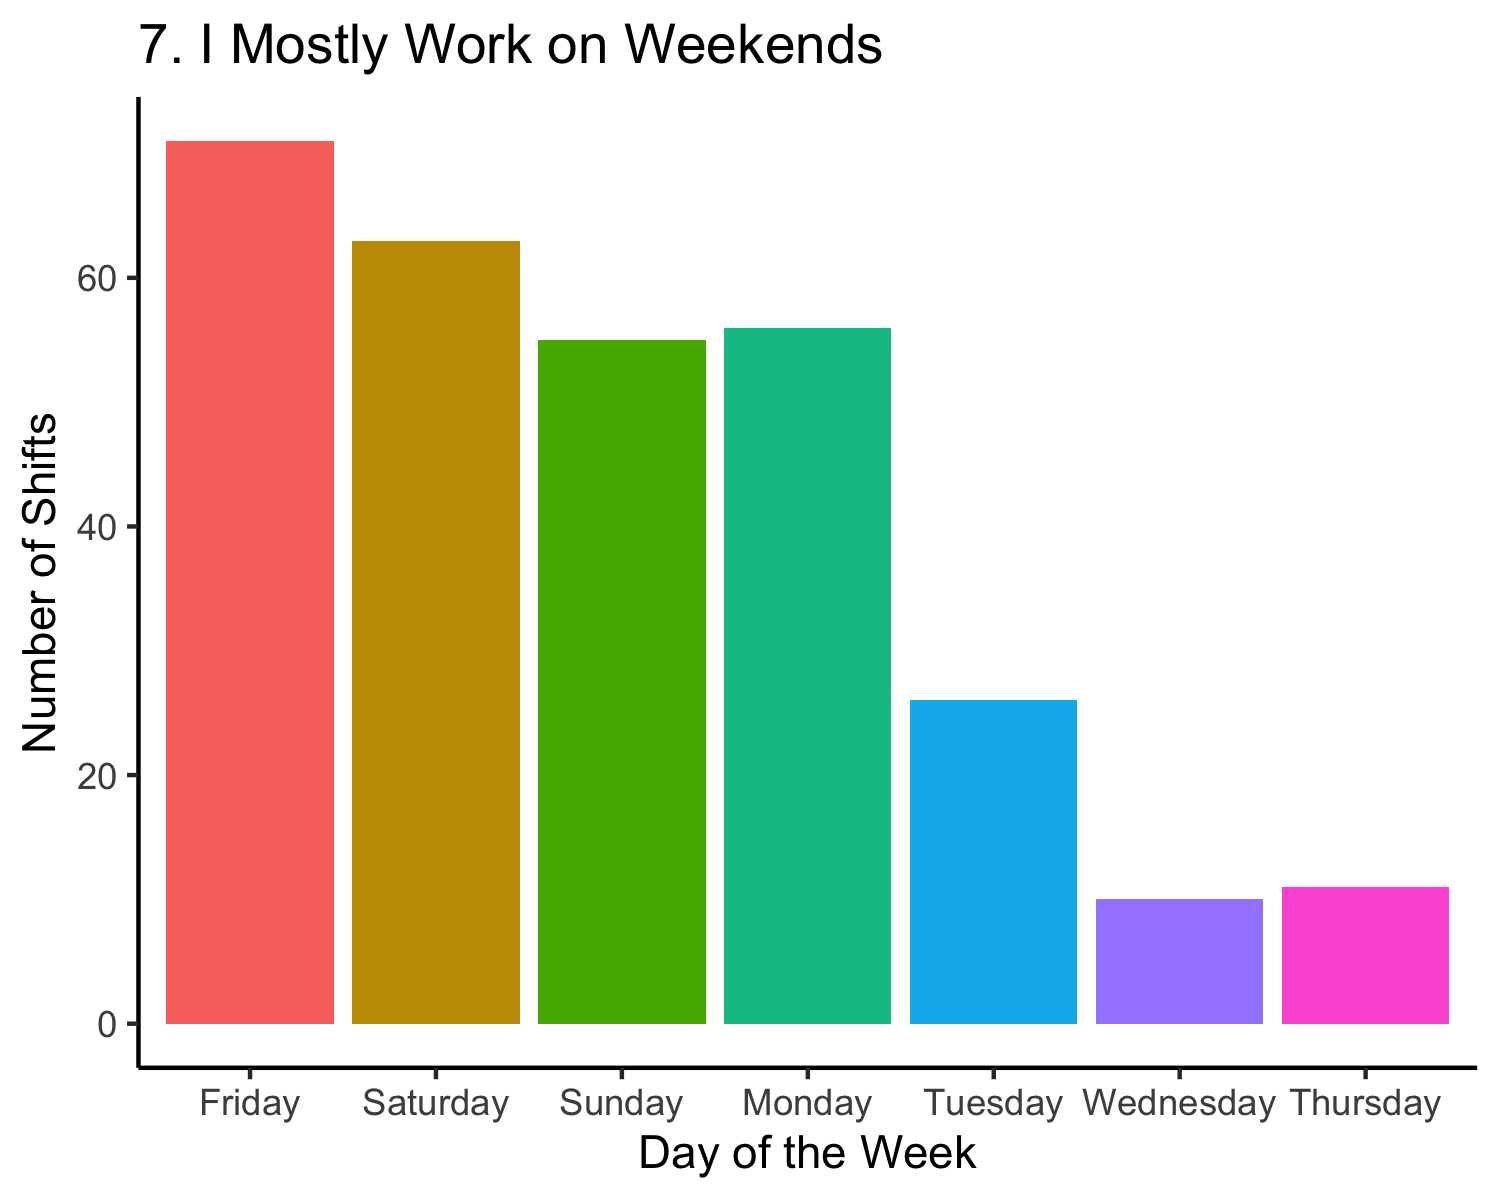

In [8]:
options(repr.plot.width=5, repr.plot.height=4, repr.plot.res = 300)

Income_week = Income |>
    mutate( Day_sorted = Day |> 
           fct_relevel('Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday')
          )

p2 = ggplot(data = Income_week, aes(x=Day_sorted, fill = Day_sorted)) +
    theme_classic() +
    geom_bar(show.legend = FALSE) +
    labs(title = "7. I Mostly Work on Weekends", x = "Day of the Week", y = "Number of Shifts")

p2

## I have worked more on weekends in general, so this is not generalizable.

In [9]:
#Income_Ordered = Income$Day <- factor(Income$Day, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

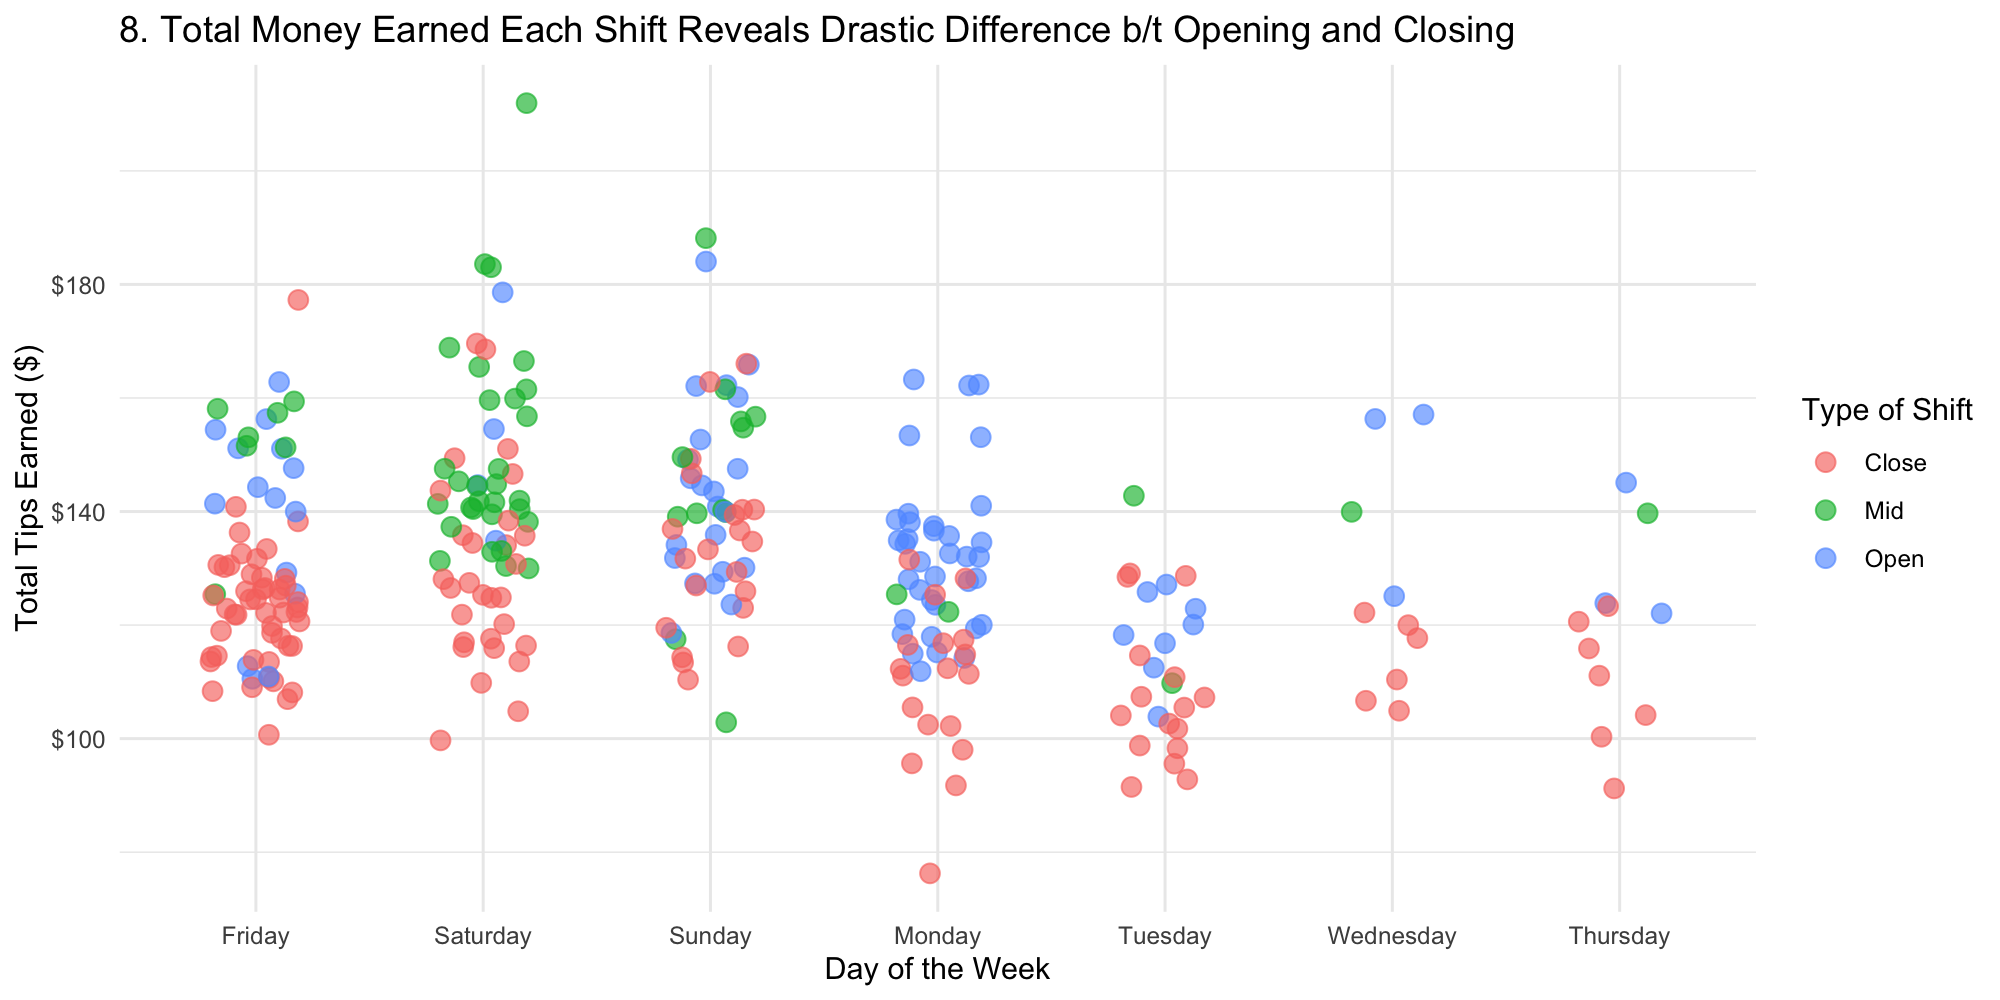

In [10]:
options( repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)


p3 = ggplot(Income_week, aes(x = Day_sorted, y = Total, color = Shift)) +
    geom_point(position = position_jitter(w=0.2, h=0), alpha=0.65, size=3) +
    labs(title = "8. Total Money Earned Each Shift Reveals Drastic Difference b/t Opening and Closing", x = "Day of the Week", y = "Total Tips Earned ($)", color = "Type of Shift") +
    scale_y_continuous(labels = scales::dollar) +
    theme_minimal()

p3

## I have made the most money on weekend opening shifts, but the few mid shifts that I have done were very lucrative too.

### Note to self: Improve colors.

In [11]:
#options( repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 500)


#p3 = ggplot(Income_week, aes(x = Day_sorted, y = Total, color = Shift)) +
    #geom_point(position = position_jitter(w=0.2, h=0), alpha=0.6, size=3) +
    #labs(title = "Total $ Made on Each Day of the Week", x = "Day of the Week", y = "Total $ Earned", color = "Type of Shift") +
    #scale_y_continuous(labels = scales::dollar) +
    #theme_minimal()

#p3

## All of my data is skewed by the fact that I have worked so many mid shifts on Saturday and so many closing shifts on Friday.

## A closer look at the exact number of shifts I have worked on each day of the week.

## This is proof that I have made more money during mid shifts than opening or closing!

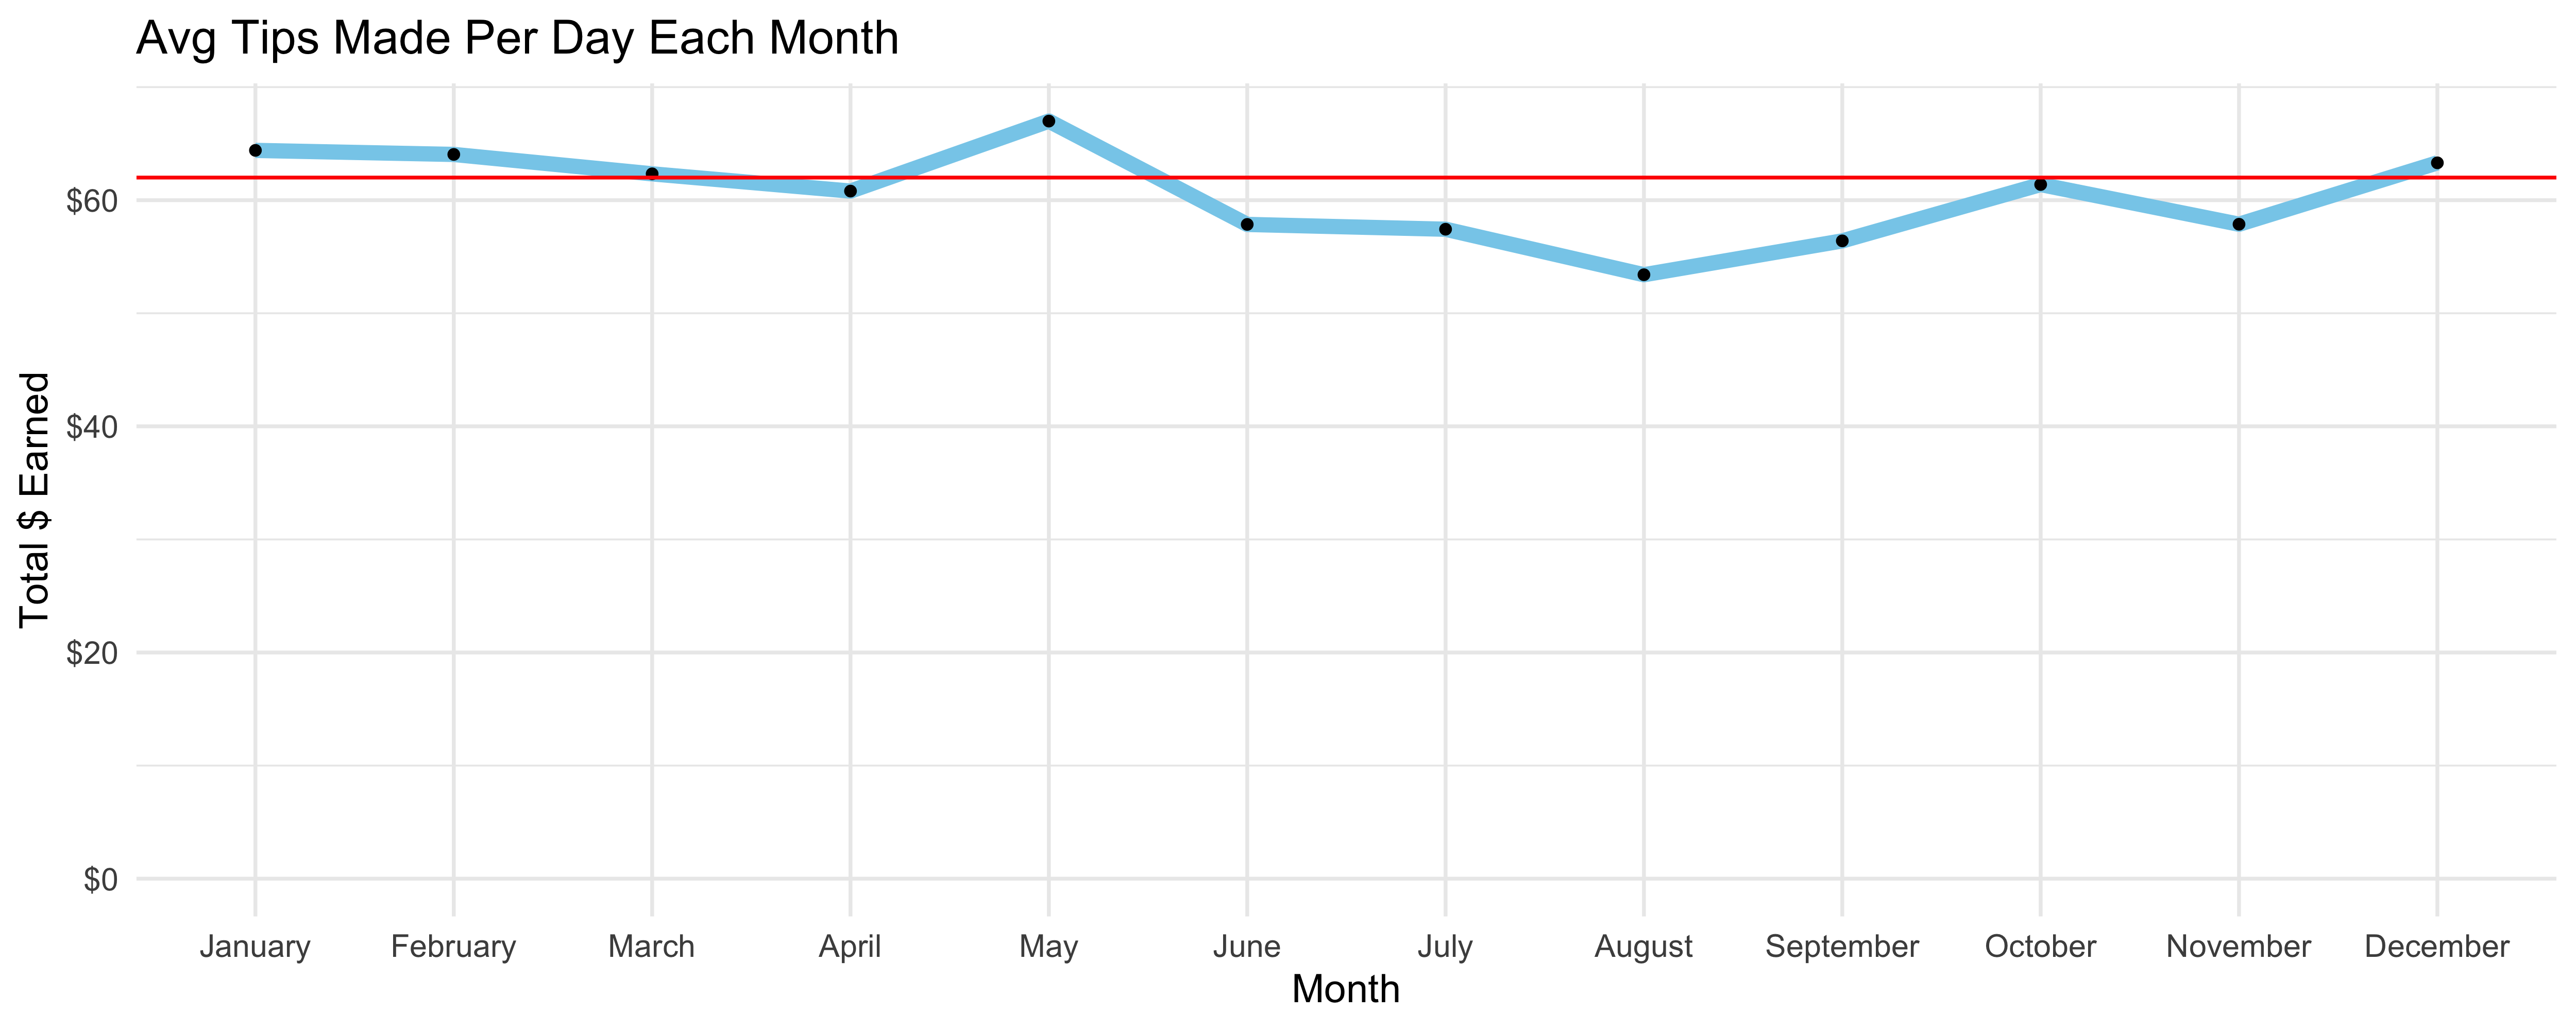

In [12]:
options( repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 500)

Income$Month = factor(Income$Month, levels = month.name)

avg_tips2 = Income |>
    group_by(Month) |>
    summarize( Tips = mean(Tips))

p5 = ggplot(avg_tips2, aes(x = Month, y = Tips, group=1)) +
    geom_line(color='sky blue', linewidth = 2) +
    geom_point(size = 1) +
    labs(title = "Avg Tips Made Per Day Each Month", x = "Month", y = "Total $ Earned") +
    scale_y_continuous(labels = scales::dollar) +
    theme_minimal() +
    expand_limits(y=0) +
    geom_hline(yintercept=62, color='red')

p5

## The overall average for daily tips has been highest in the winter (December through March). The next line graph is the same data, just zoomed in to make the comparisons more visible. The month of May might be an outlier.

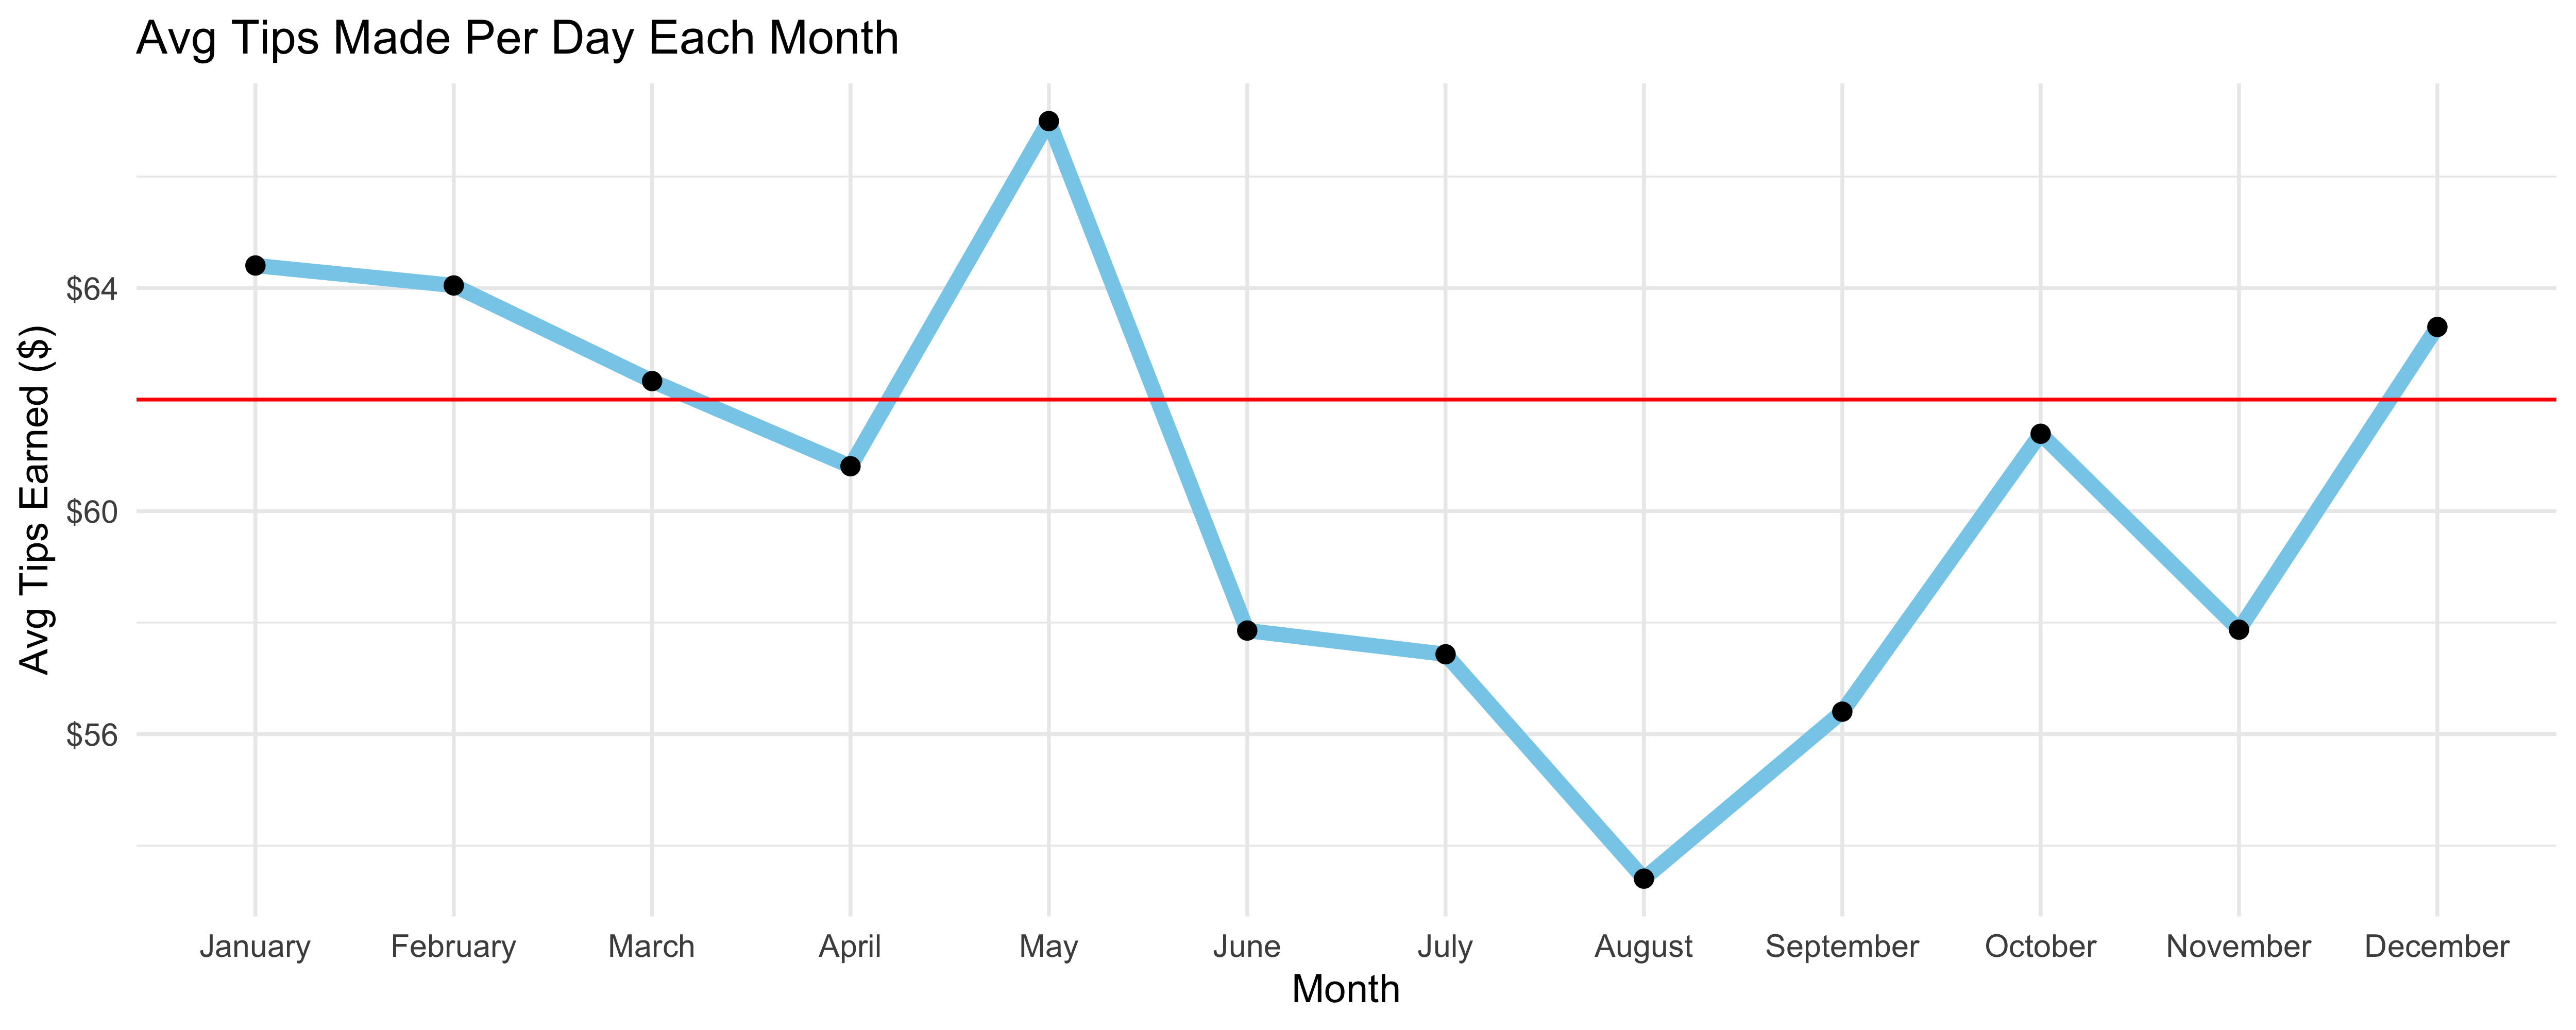

In [13]:
options( repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 500)

p5 = ggplot(avg_tips2, aes(x = Month, y = Tips, group=1)) +
    geom_line(color='sky blue', linewidth = 2) +
    geom_point(size = 2) +
    labs(title = "Avg Tips Made Per Day Each Month", x = "Month", y = "Avg Tips Earned ($)") +
    scale_y_continuous(labels = scales::dollar) +
    theme_minimal() +
    geom_hline(yintercept=62, color='red')

p5

## Limitations: None of these graphics account for changes in management (café manager and assistant manager, the changes that management makes to the appearance and menu of the shop, number of baristas on the floor, and other confounding variables that would be difficult to include. 

# Conclusion: Overall, this project did not reveal any surprises. Winter would be a popular time to order hot drinks, weekends are the days where people have the most time available to visit coffee shops, and less people visit in the evening because caffeine can make it difficult to sleep.

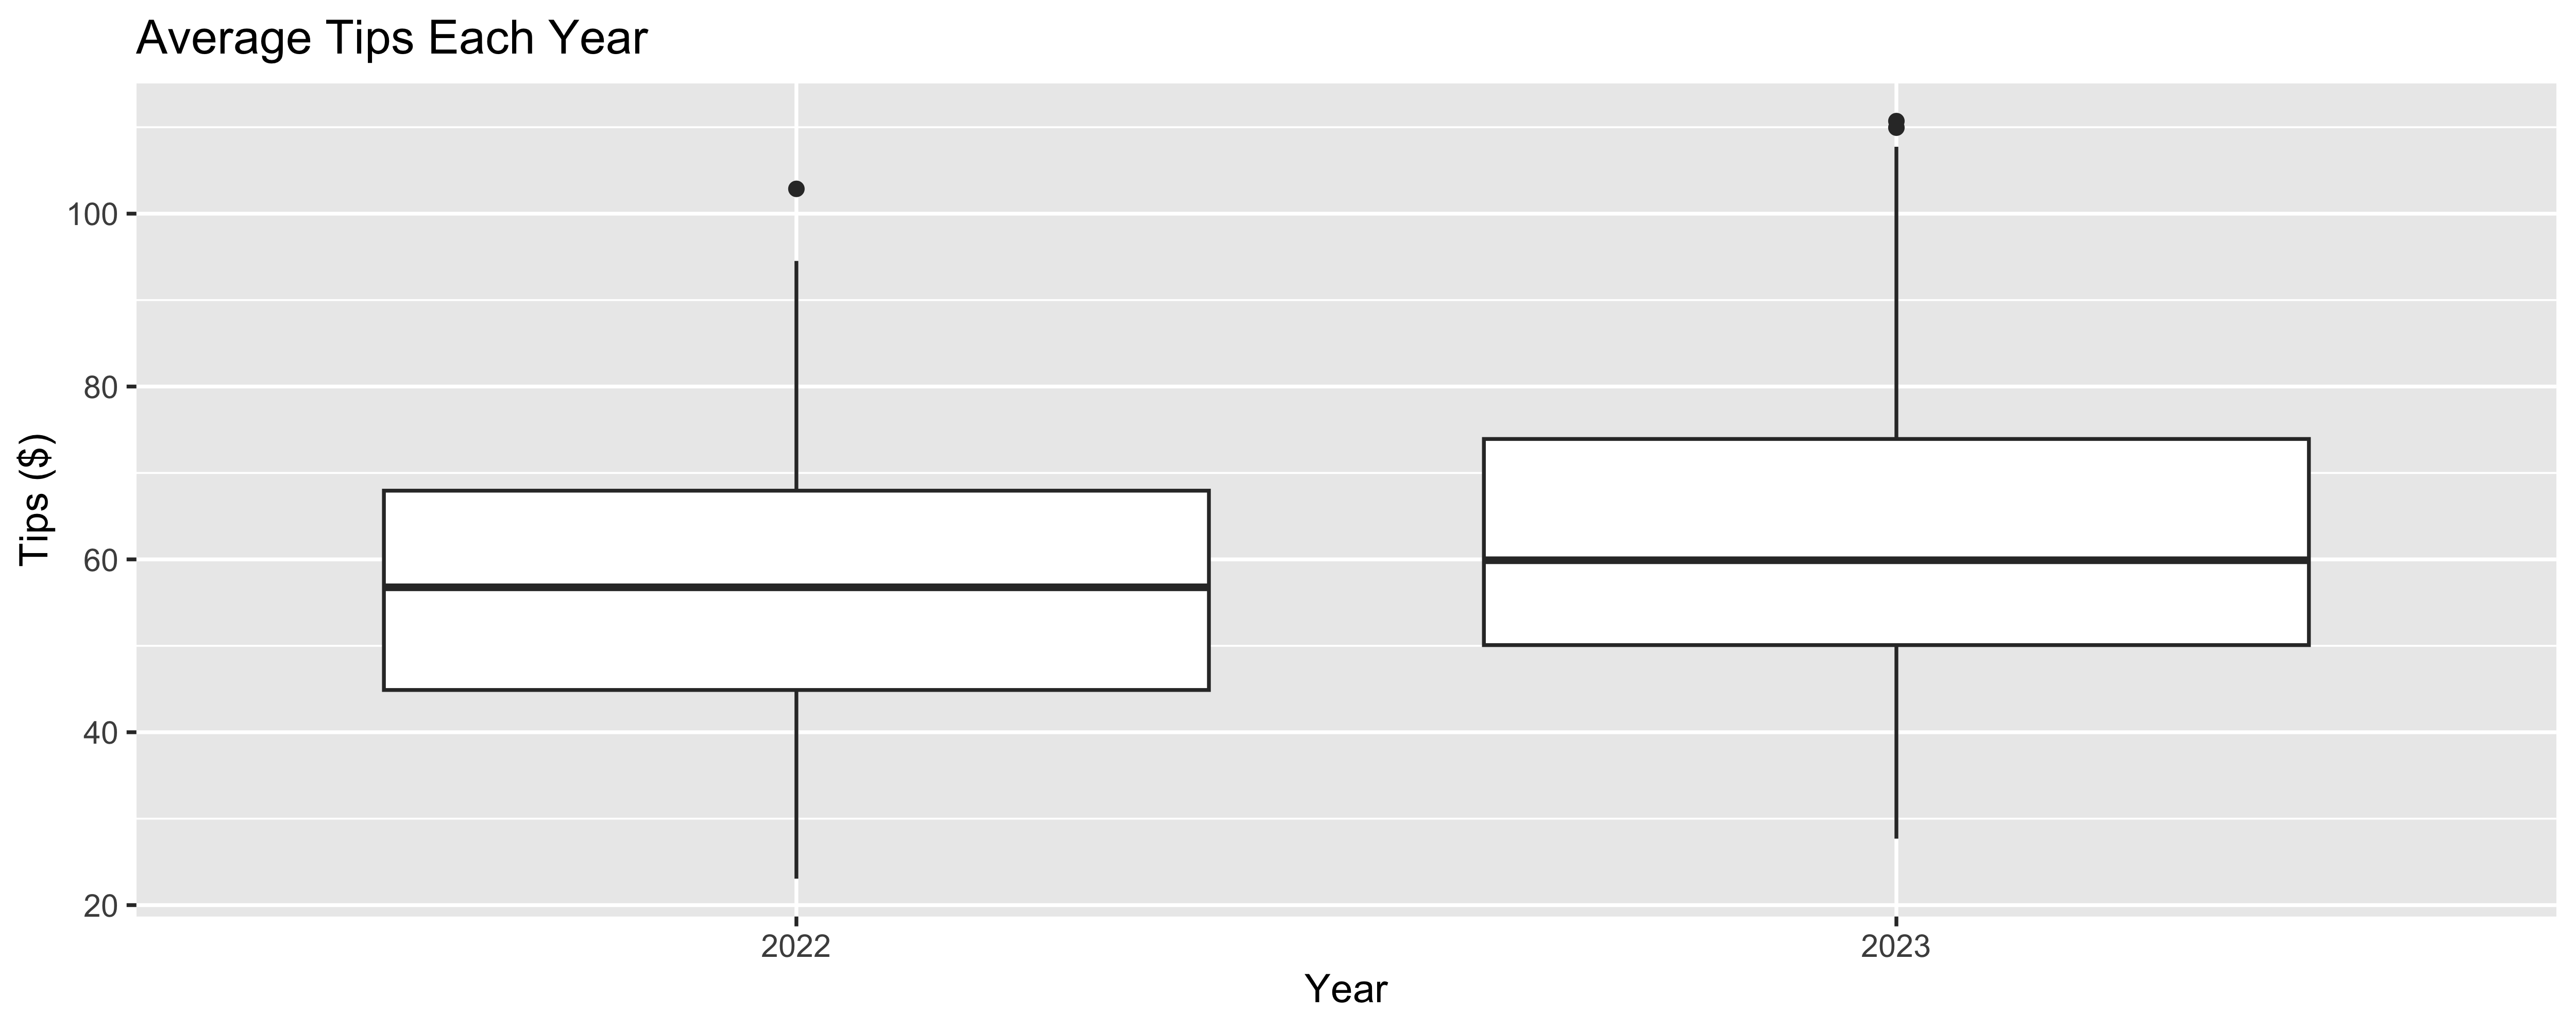

In [15]:
ggplot(Income, aes(group = factor(Year), x = factor(Year), y = Tips)) + 
  geom_boxplot() +
  labs(title = "Average Tips Each Year", x = "Year", y = "Tips ($)") 


## Failure to create line chart that simaltaneously shows both years in two animated line charts with months on the x-axis.

https://r-graph-gallery.com/287-smooth-animation-with-tweenr.html 

```
 ggplot(avg_tips2, aes(x = Month, y = Tips, group = Year, color = Year)) +
    geom_line() +
    geom_point() +
    ggtitle('Tips Every Month of the Year {closest_state}') +
    labs(x = "Month", y = "Tips") +
    transition_reveal(Month)   
```

## This is a failed attempt to animate my previously made line graphs with the same animation functions I used for the boxplots.

```
ggplot(avg_tips2, aes(x = Month, y = Tips, group = 1)) +
    geom_line(color='sky blue', linewidth = 2) +
    ggtitle('Tips Every Month of the Year {closest_state}') +
    transition_states(factor(Year),
                      transition_length = 2,
                      state_length = 1) + 
    enter_fade() + 
    exit_shrink() +
    ease_aes('sine-in-out') +
    labs(x = "Month", y = "Tips")

display_gif(anim2, w = 1000, h = 600)
```